In [71]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

In [27]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [28]:
# Ordenar por una columna #
df = df.sort_values('sepal length (cm)').reset_index(drop=True)

In [29]:
# Generar una variable que sea el acumulado de una columna #

acumulado = 0
acumulados = []
for n in df['sepal length (cm)']:
    acumulado = acumulado + n
    acumulados.append(acumulado)

df['sepal length (cm) acumulado'] = acumulados


In [38]:
# Generar una variable que sea el porcentaje acumulado de una columna #

porcentaje_acumulado = []
porcentajes_acumulados = []

for n in df['sepal length (cm) acumulado']:
    porcentaje_acumulado = n/(sum(df['sepal length (cm)']))
    porcentajes_acumulados.append(porcentaje_acumulado)
df['% sepal length (cm) acumulado'] = porcentajes_acumulados

In [60]:
# Generar una variable que sea el porcentaje acumulado del indece #

indice_acumulado = []
indices_acumulado = []

for n in pd.Series(df.index.values):
    indice_acumulado = n/max(df.index)
    indices_acumulado.append(indice_acumulado)
df['% Indice acumulado'] = indices_acumulado


In [80]:
# Genearar nueva columna con la etiqueda del umbral #

# Definir la función para aplicar la condición if #

def asignar_etiqueta(valor):
    if valor < 4:
        return 'Menor 4'
    elif valor < 5:
        return 'Entre 4 y 5'
    elif valor < 6:
        return 'Entre 5 y 6'
    elif valor < 7:
        return 'Entre 6 y 7'
    else:
        return 'Mayor 7'

df['Umbral sepal length (cm)'] = df['sepal length (cm)'].apply(asignar_etiqueta)


In [81]:
# Generar tabla con percentiles #

percentiles = [0.25, 0.50, 0.75, 1]
filas_percentiles = []

for n in percentiles:
    valor_percentil = int(max(df.index)*n)
    filas_percentil = df.loc[df.index == valor_percentil]
    filas_percentiles.append(filas_percentil)

df_percentiles = pd.concat(filas_percentiles)
df_percentiles['Percentil'] = percentiles
df_percentiles = df_percentiles[['Percentil', '% Indice acumulado', 'sepal length (cm)', 'sepal length (cm) acumulado', '% sepal length (cm) acumulado']]
df_percentiles

,Percentil,% Indice acumulado,sepal length (cm),sepal length (cm) acumulado,% sepal length (cm) acumulado
37,0.25,0.248322,5.1,183.8,0.209698
74,0.50,0.496644,5.8,386.9,0.441415
111,0.75,0.744966,6.4,613.3,0.699715
149,1.00,1.000000,7.9,876.5,1.000000


In [93]:
# Generar una tabla con los valores de los umbrales #

Umbrales_sepal = pd.DataFrame(df.groupby('Umbral sepal length (cm)').agg(Cantidad_observaciones = ('Umbral sepal length (cm)', 'count'), Suma_sepal = ('sepal length (cm)', 'sum'))).reset_index()


# Calcular la suma de todas las filas y crear una nueva fila con la suma

suma_total = Umbrales_sepal.sum()
nueva_fila = pd.DataFrame([suma_total], columns=Umbrales_sepal.columns)
nueva_fila.iloc[0, 0] = 'Total'

# Agregar la nueva fila al DataFrame

Umbrales_sepal = Umbrales_sepal.append(nueva_fila, ignore_index=True)

Umbrales_sepal

C:\Users\Santiago\AppData\Local\Temp\ipykernel_10428\2164419736.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Umbrales_sepal = Umbrales_sepal.append(nueva_fila, ignore_index=True)


,Umbral sepal length (cm),Cantidad_observaciones,Suma_sepal
0,Entre 4 y 5,22,103.2
1,Entre 5 y 6,61,330.4
2,Entre 6 y 7,54,346.2
3,Mayor 7,13,96.7
4,Total,150,876.5


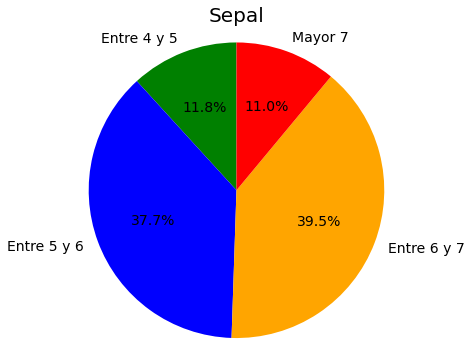

In [119]:
# Grafico de torta #

import matplotlib.pyplot as plt

# Datos para el gráfico de torta
valores = Umbrales_sepal[Umbrales_sepal['Umbral sepal length (cm)'] != 'Total']['Suma_sepal']
etiquetas = Umbrales_sepal[Umbrales_sepal['Umbral sepal length (cm)'] != 'Total']['Umbral sepal length (cm)']
colores = ['green', 'blue', 'orange', 'red'] 

# Configuración del gráfico de torta
fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño del gráfico en pulgadas
ax.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, textprops={'fontsize': 14})

# Aspecto del gráfico
ax.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse

# Título del gráfico
ax.set_title('Sepal', fontsize=20)  # Tamaño del título

# Guardar el gráfico en una imagen
fig.savefig('C:\\Users\\Santiago\\OneDrive\\Escritorio\\Python\\grafico.png')

In [123]:
# Crear un excel y pegar cada tabla en una hoja diferente #

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image

# Crear un nuevo libro de Excel
wb = Workbook()

# Crear una hoja para cada tabla y pegar los datos
ws1 = wb.create_sheet(title='Sepal')
for row in dataframe_to_rows(df, index=False, header=True):
    ws1.append(row)

ws2 = wb.create_sheet(title='Percentiles')
for row in dataframe_to_rows(df_percentiles, index=False, header=True):
    ws2.append(row)

ws3 = wb.create_sheet(title='Umbrales')
for row in dataframe_to_rows(Umbrales_sepal, index=False, header=True):
    ws3.append(row)

img = Image('grafico.png')
ws3.add_image(img, 'G1')  # Utilizar ws3 en lugar de ws_umbrales

# Eliminar la hoja por defecto "Sheet"
del wb['Sheet']

# Guardar el archivo de Excel
wb.save('C:\\Users\\Santiago\\OneDrive\\Escritorio\\Python\\Sepal.xlsx')


In [101]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image
from openpyxl.chart import BarChart, Reference
from openpyxl.worksheet.table import Table

# Crear un nuevo libro de Excel
wb = Workbook()

# Crear una hoja para los datos
ws = wb.active
ws.title = 'Datos'

# Insertar los datos de df en la hoja
for row in dataframe_to_rows(df, index=False, header=True):
    ws.append(row)

# Insertar los datos de df_percentiles en la hoja
for row in dataframe_to_rows(df_percentiles, index=False, header=True):
    ws.append(row)

# Insertar los datos de Umbrales_sepal en la hoja
for row in dataframe_to_rows(Umbrales_sepal, index=False, header=True):
    ws.append(row)

# Crear una tabla a partir de los datos en la hoja
tabla_rango = f'A1:{chr(ord("A") + len(Umbrales_sepal.columns) - 1)}{ws.max_row}'
tabla = Table(displayName='Tabla1', ref=tabla_rango)
ws.add_table(tabla)

# Crear un gráfico de barras a partir de los datos de la tabla
grafico = BarChart()
grafico.title = "Gráfico de barras"
grafico.x_axis.title = "Col1"
grafico.y_axis.title = "Col2"
datos_grafico = Reference(ws, min_col=2, min_row=2, max_col=2, max_row=ws.max_row)
categorias_grafico = Reference(ws, min_col=1, min_row=2, max_row=ws.max_row)
grafico.add_data(datos_grafico, titles_from_data=True)
grafico.set_categories(categorias_grafico)
grafico_chart = grafico.to_sheet(ws_grafico, start="A1")
grafico_chart.title = "Gráfico de barras"

# Crear una nueva hoja para el gráfico
ws_grafico = wb.create_sheet(title='Gráfico')

# Guardar el archivo de Excel
wb.save('C:\\Users\\Santiago\\OneDrive\\Escritorio\\Python\\nuevo_excel.xlsx')



AttributeError: 'BarChart' object has no attribute 'to_sheet'